In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')


In [2]:
df = pd.read_csv("fraud_feature_engineering_example.csv")
print(df.head())

  trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ...  \
0                561 Perry Cove  Moravian Falls  ...   
1  43039 Riley Greens Suite 393          Orient  ...   
2      594 Whi

In [3]:
df.shape

(1852394, 27)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 27 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   trans_date_trans_time         object 
 1   cc_num                        int64  
 2   merchant                      object 
 3   category                      object 
 4   amt                           float64
 5   first                         object 
 6   last                          object 
 7   gender                        object 
 8   street                        object 
 9   city                          object 
 10  state                         object 
 11  zip                           int64  
 12  lat                           float64
 13  long                          float64
 14  city_pop                      int64  
 15  job                           object 
 16  dob                           object 
 17  trans_num                     object 
 18  unix_time             

In [5]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,amt_month,amt_year,amt_month_shopping_net_spend,count_month_shopping_net
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03,4.153689e+03,4.530560e+04,3.762028e+02,4.567241e+00
std,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02,3.909005e+03,3.586752e+04,7.253531e+02,4.575502e+00
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00,1.000000e+00,1.020000e+00,0.000000e+00,0.000000e+00
25%,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00,1.344790e+03,1.734142e+04,9.020000e+00,1.000000e+00
50%,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00,3.071990e+03,3.743910e+04,7.589000e+01,3.000000e+00
75%,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00,5.738470e+03,6.472088e+04,4.259800e+02,7.000000e+00
max,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00,4.326189e+04,2.190868e+05,1.204718e+04,4.800000e+01


In [6]:
df.tail

<bound method NDFrame.tail of         trans_date_trans_time            cc_num  \
0         2019-01-01 00:00:18  2703186189652095   
1         2019-01-01 00:00:44      630423337322   
2         2019-01-01 00:00:51    38859492057661   
3         2019-01-01 00:01:16  3534093764340240   
4         2019-01-01 00:03:06   375534208663984   
...                       ...               ...   
1852389   2020-12-31 23:59:07    30560609640617   
1852390   2020-12-31 23:59:09  3556613125071656   
1852391   2020-12-31 23:59:15  6011724471098086   
1852392   2020-12-31 23:59:24     4079773899158   
1852393   2020-12-31 23:59:34  4170689372027579   

                                   merchant        category     amt  \
0                fraud_Rippin, Kub and Mann        misc_net    4.97   
1           fraud_Heller, Gutmann and Zieme     grocery_pos  107.23   
2                      fraud_Lind-Buckridge   entertainment  220.11   
3        fraud_Kutch, Hermiston and Farrell   gas_transport   45.00   
4 

In [7]:
df.columns.tolist()

['trans_date_trans_time',
 'cc_num',
 'merchant',
 'category',
 'amt',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'zip',
 'lat',
 'long',
 'city_pop',
 'job',
 'dob',
 'trans_num',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud',
 'amt_month',
 'amt_year',
 'amt_month_shopping_net_spend',
 'count_month_shopping_net',
 'first_time_at_merchant']

In [8]:
df.isnull().sum()

trans_date_trans_time           0
cc_num                          0
merchant                        0
category                        0
amt                             0
first                           0
last                            0
gender                          0
street                          0
city                            0
state                           0
zip                             0
lat                             0
long                            0
city_pop                        0
job                             0
dob                             0
trans_num                       0
unix_time                       0
merch_lat                       0
merch_long                      0
is_fraud                        0
amt_month                       0
amt_year                        0
amt_month_shopping_net_spend    0
count_month_shopping_net        0
first_time_at_merchant          0
dtype: int64

In [9]:
df.nunique()

trans_date_trans_time           1819551
cc_num                              999
merchant                            693
category                             14
amt                               60616
first                               355
last                                486
gender                                2
street                              999
city                                906
state                                51
zip                                 985
lat                                 983
long                                983
city_pop                            891
job                                 497
dob                                 984
trans_num                       1852394
unix_time                       1819583
merch_lat                       1754157
merch_long                      1809753
is_fraud                              2
amt_month                        896534
amt_year                        1694572
amt_month_shopping_net_spend      73861


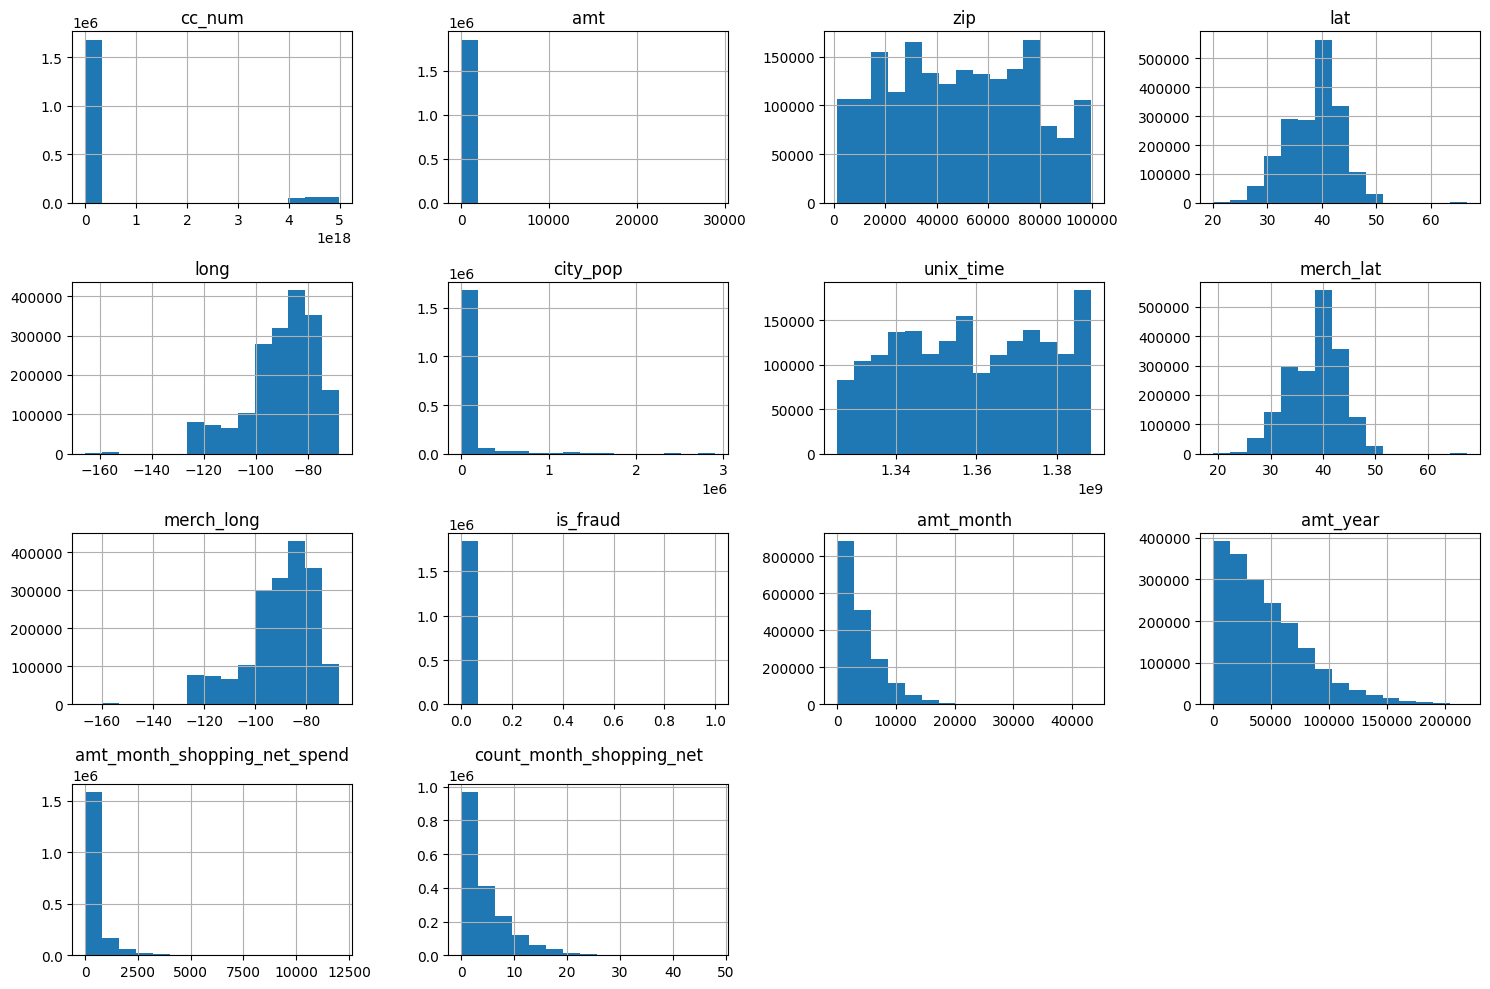

In [10]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols].hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.tight_layout()
plt.show()

Vamos a realizar un gráfico de densidad de kernel, debido a que queremos ver la forma general de la distribución de los datos.

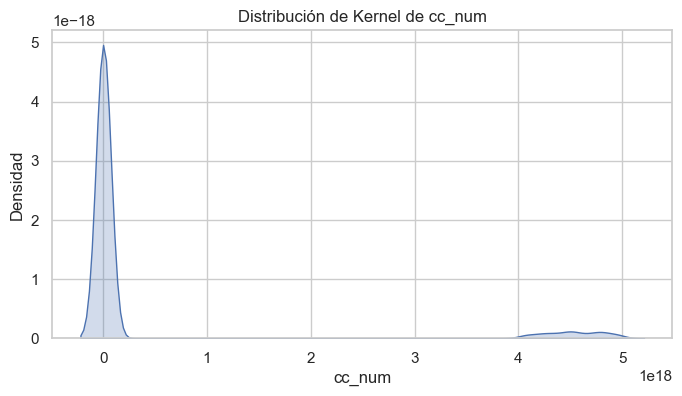

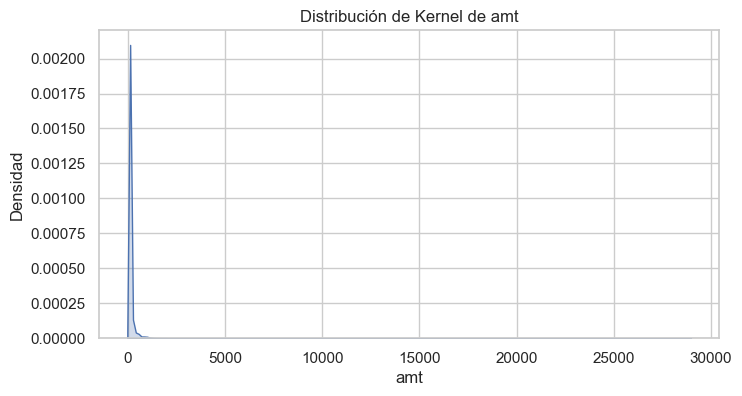

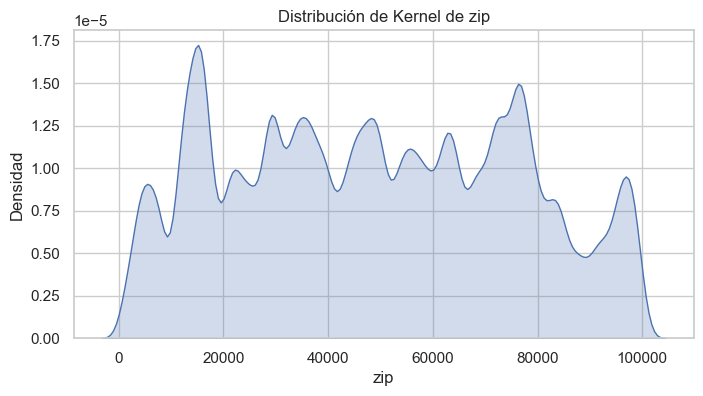

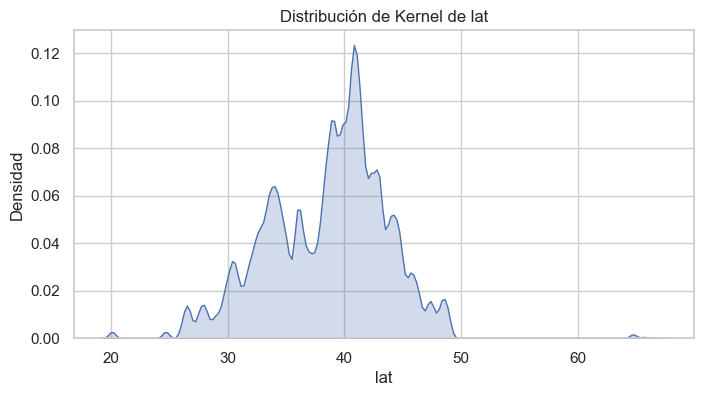

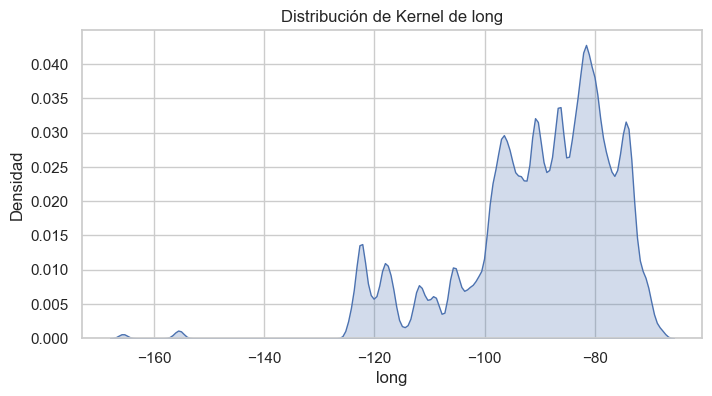

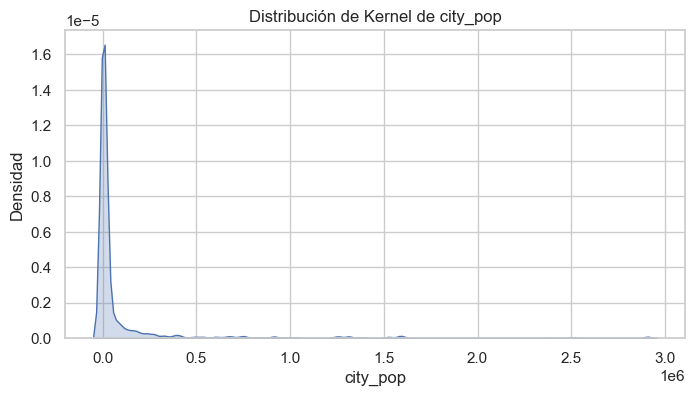

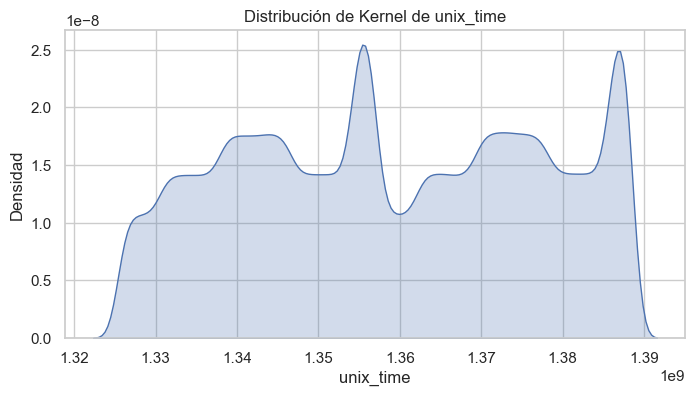

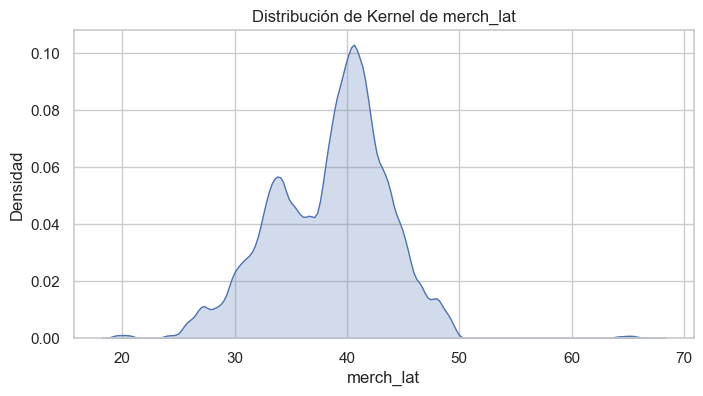

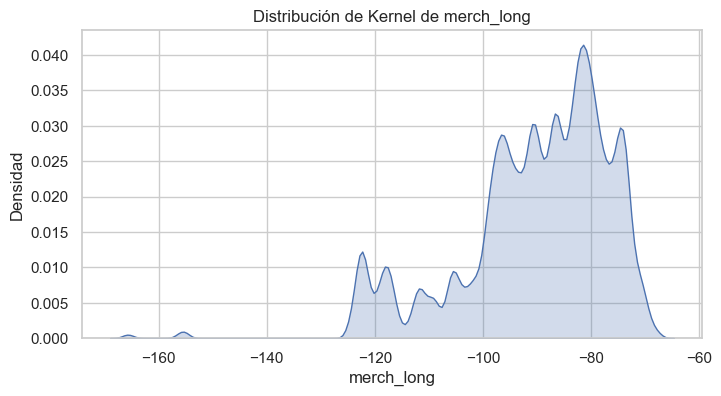

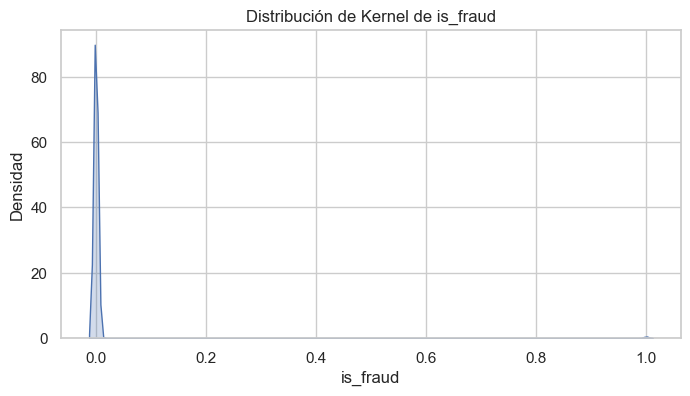

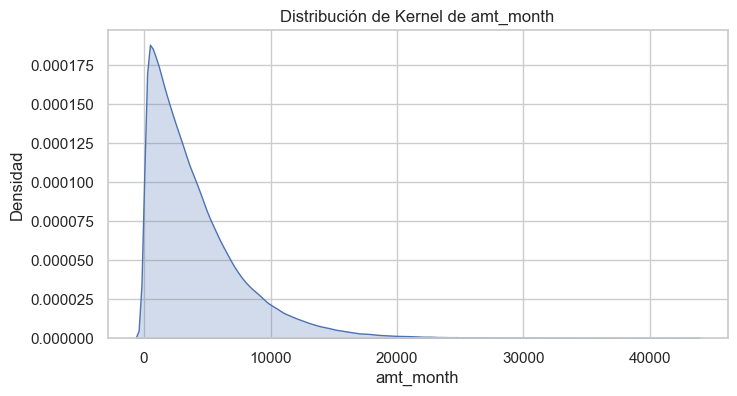

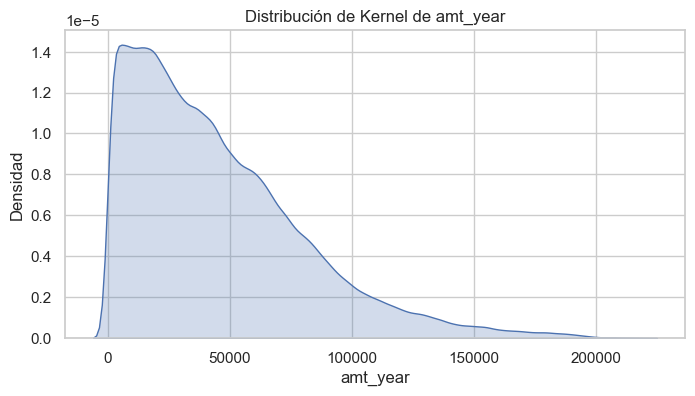

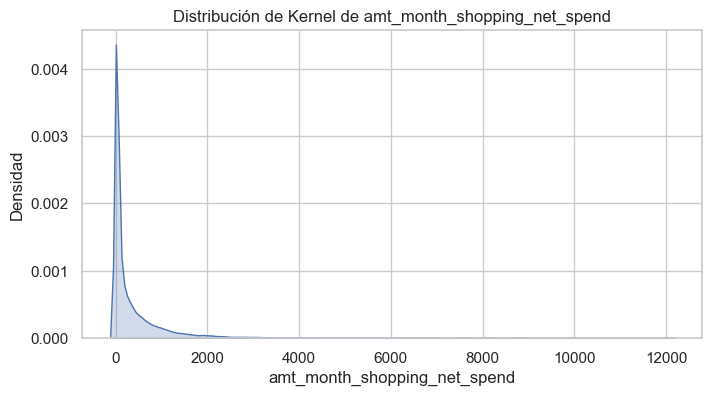

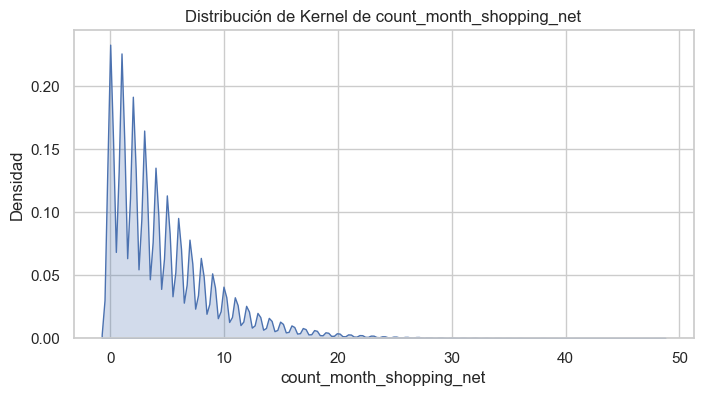

In [11]:
num_cols = df.select_dtypes(include=['float64', 'int64'])


sns.set(style='whitegrid')

# Creamos un gráfico de densidad para cada variable numérica
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(df[col], fill=True) 
    plt.title(f'Distribución de Kernel de {col}')
    plt.xlabel(col)
    plt.ylabel('Densidad')
    plt.show()

In [12]:
#convertir trans_date en datetime

df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Convertir 'dob' en datetime
df['dob'] = pd.to_datetime(df['dob'])

df['hour'] = df['trans_date_trans_time'].dt.hour
df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek
df['month'] = df['trans_date_trans_time'].dt.month

Analisis Univariado

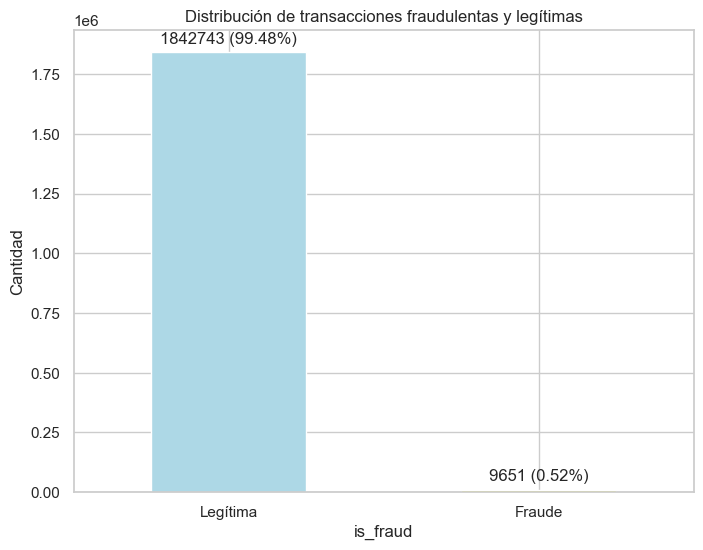

In [13]:

fraud_counts = df['is_fraud'].value_counts()
total_transactions = fraud_counts.sum()

plt.figure(figsize=(8, 6))
fraud_counts.plot(kind='bar', color=['lightblue', 'yellow'])
plt.title('Distribución de transacciones fraudulentas y legítimas')
plt.xlabel('is_fraud')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['Legítima', 'Fraude'], rotation=0)

for i, count in enumerate(fraud_counts):
    plt.text(i, count + total_transactions * 0.02, f"{count} ({count / total_transactions:.2%})", ha='center')

plt.show()

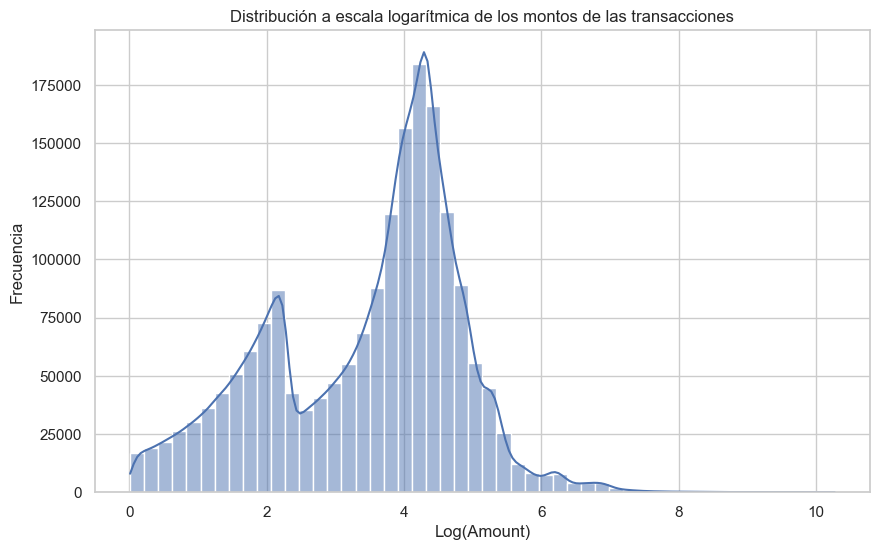

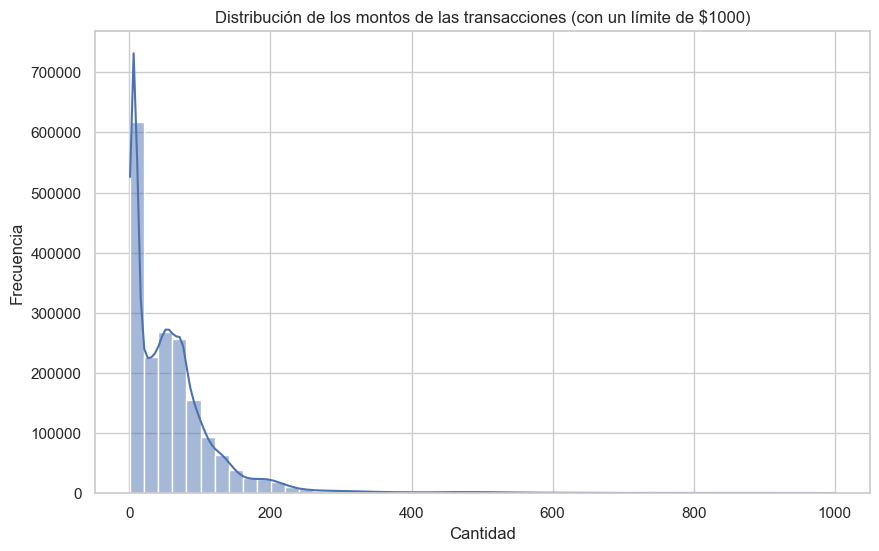

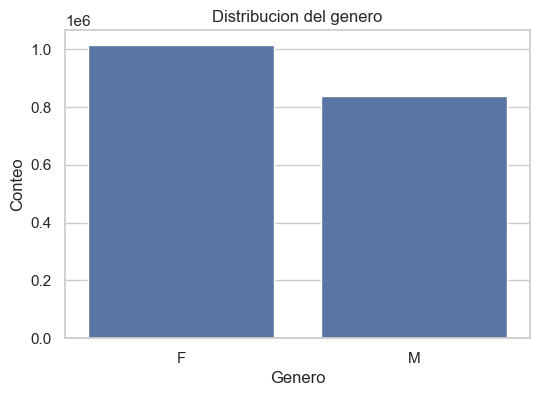

In [14]:
# Histograma cantidad de transacciones


plt.figure(figsize=(10, 6))
sns.histplot(np.log(df['amt'] + 0.01), bins=50, kde=True)
plt.title('Distribución a escala logarítmica de los montos de las transacciones')
plt.xlabel('Log(Amount)')
plt.ylabel('Frecuencia')
plt.show()

filtered_df = df[df['amt'] < 1000]  
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['amt'], bins=50, kde=True)
plt.title('Distribución de los montos de las transacciones (con un límite de $1000)')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.show()
# Por genero de la persona
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=df)
plt.title('Distribucion del genero')
plt.xlabel('Genero')
plt.ylabel('Conteo')
plt.show()


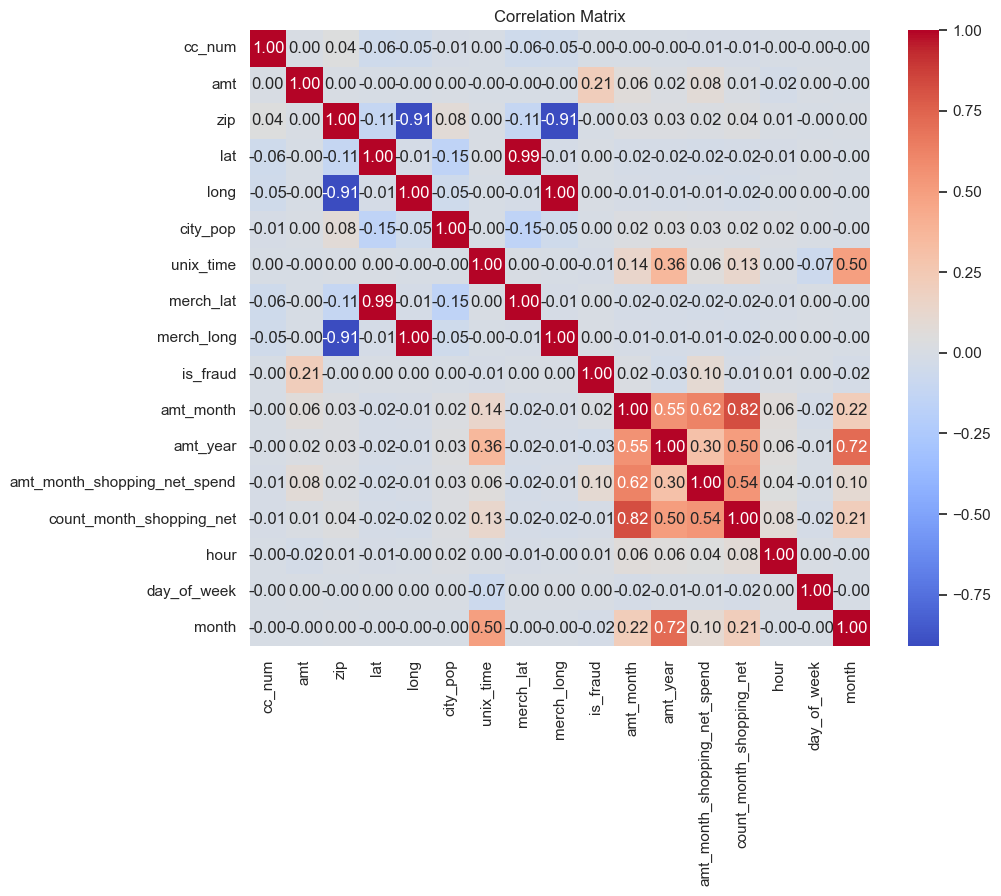

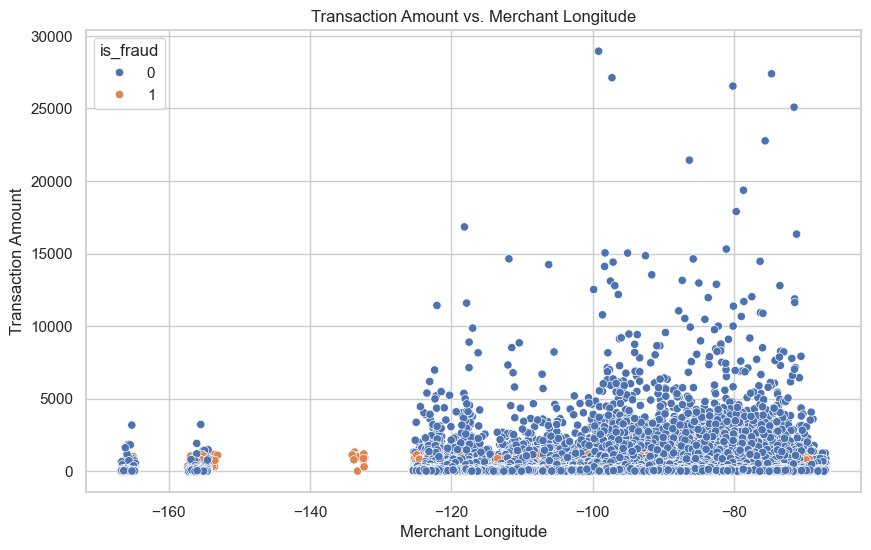

In [15]:
# heatmap de correlacion 
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Diagrama de dispersión del monto de la transacción versus la longitud del comerciante
plt.figure(figsize=(10, 6))
sns.scatterplot(x='merch_long', y='amt', hue='is_fraud', data=df)
plt.title('Transaction Amount vs. Merchant Longitude')
plt.xlabel('Merchant Longitude')
plt.ylabel('Transaction Amount')
plt.show()


Analisis Series de tiempo

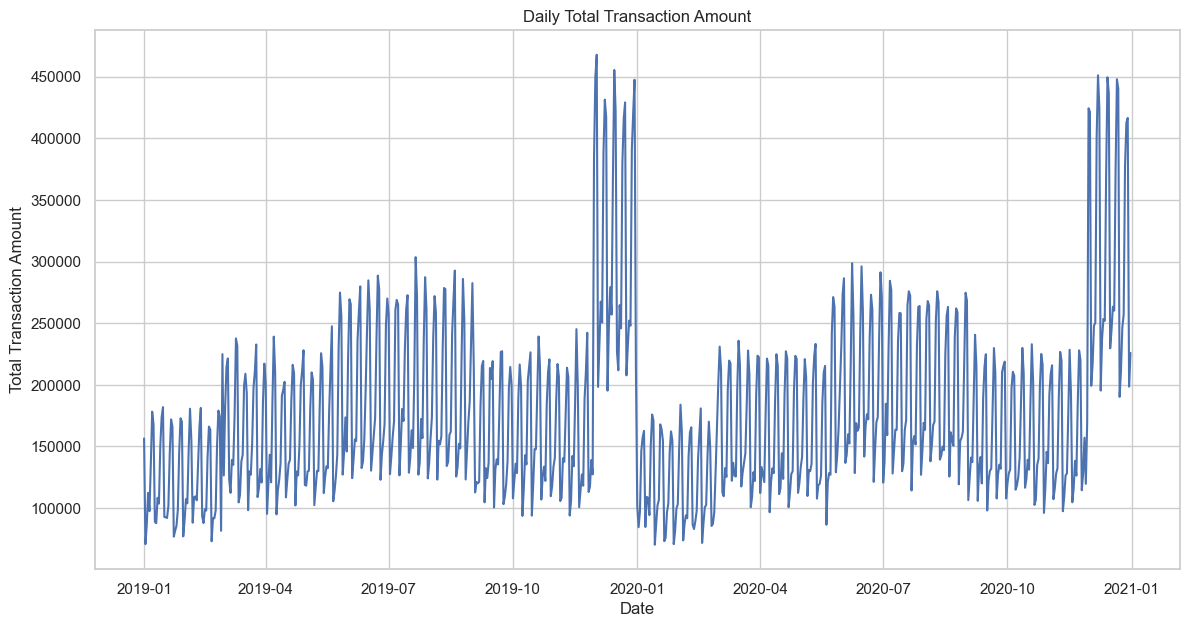

In [16]:

df['date'] = df['trans_date_trans_time'].dt.date

# Total diario de transacciones Daily 
daily_amt = df.groupby('date')['amt'].sum()

plt.figure(figsize=(14, 7))
daily_amt.plot()
plt.title('Daily Total Transaction Amount')
plt.xlabel('Date')
plt.ylabel('Total Transaction Amount')
plt.show()


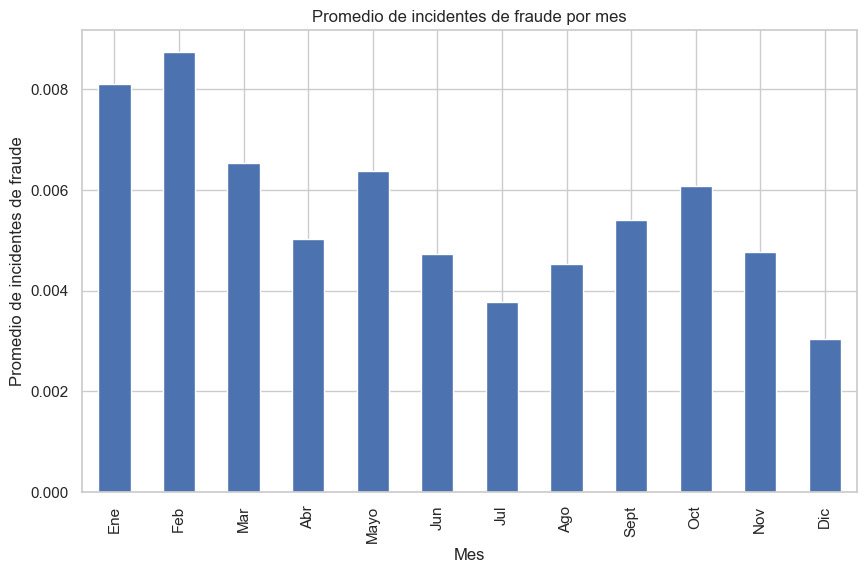

In [17]:

df['month'] = df['trans_date_trans_time'].dt.month
monthly_fraud = df.groupby('month')['is_fraud'].mean()

plt.figure(figsize=(10, 6))
monthly_fraud.plot(kind='bar')
plt.title('Promedio de incidentes de fraude por mes')
plt.xlabel('Mes')
plt.ylabel('Promedio de incidentes de fraude')
plt.xticks(ticks=range(0, 12), labels=['Ene', 'Feb', 'Mar', 'Abr', 'Mayo', 'Jun', 'Jul', 'Ago', 'Sept', 'Oct', 'Nov', 'Dic'])
plt.show()


### Feature Engineering

In [18]:
#Extraer caracteristicas de tiempo

df['year'] = df['trans_date_trans_time'].dt.year
df['month'] = df['trans_date_trans_time'].dt.month
df['day'] = df['trans_date_trans_time'].dt.day
df['hour'] = df['trans_date_trans_time'].dt.hour
df['weekday'] = df['trans_date_trans_time'].dt.weekday 

# lunes = 0, domingo = 6

In [19]:
#Calculo de la edad del consumidor al momento de la transaccion 
df['age_at_transaction'] = df['trans_date_trans_time'].dt.year - df['dob'].dt.year

In [20]:
df[['trans_date_trans_time', 'age_at_transaction', 'hour', 'weekday', 'month', 'year', ]].head() #Verificar caracteristicas

,trans_date_trans_time,age_at_transaction,hour,weekday,month,year
0,2019-01-01 00:00:18,31,0,1,1,2019
1,2019-01-01 00:00:44,41,0,1,1,2019
2,2019-01-01 00:00:51,57,0,1,1,2019
3,2019-01-01 00:01:16,52,0,1,1,2019
4,2019-01-01 00:03:06,33,0,1,1,2019


In [21]:
# One-hot encoding para variables categoricas
df_encoded = pd.get_dummies(df, columns=['gender', 'category', 'state'])

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['merchant_encoded'] = encoder.fit_transform(df['merchant'])

In [22]:
#Conteo de transacciones por consumidor

df['transaction_count'] = df.groupby('cc_num')['cc_num'].transform('count')

In [23]:
# Caracteristicas de distancia

from sklearn.metrics.pairwise import haversine_distances
from math import radians


def calculate_distance(lat1, lon1, lat2, lon2):

    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    return haversine_distances([[lat1, lon1], [lat2, lon2]])[0][1] * 6371000/1000  


df['distance'] = df.apply(lambda row: calculate_distance(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)

df[['lat', 'long', 'merch_lat', 'merch_long', 'distance']].head() #verificar

,lat,long,merch_lat,merch_long,distance
0,36.0788,-81.1781,36.011293,-82.048315,78.597568
1,48.8878,-118.2105,49.159047,-118.186462,30.212176
2,42.1808,-112.2620,43.150704,-112.154481,108.206083
3,46.2306,-112.1138,47.034331,-112.561071,95.673231
4,38.4207,-79.4629,38.674999,-78.632459,77.556744


In [24]:
merchants_visited = df.groupby('cc_num')['merchant'].nunique().reset_index(name='merchants_visited') #ver donde ha comprado el consumidor

df = pd.merge(df, merchants_visited, on='cc_num', how='left')

df[['cc_num', 'merchant', 'merchants_visited']].head() #verificar

,cc_num,merchant,merchants_visited
0,2703186189652095,"fraud_Rippin, Kub and Mann",660
1,630423337322,"fraud_Heller, Gutmann and Zieme",681
2,38859492057661,fraud_Lind-Buckridge,431
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",423
4,375534208663984,fraud_Keeling-Crist,652


In [25]:
# Cantidad de anomalias 


df['avg_amount'] = df.groupby('cc_num')['amt'].transform('mean')
df['std_amount'] = df.groupby('cc_num')['amt'].transform('std')


df['amount_anomaly'] = (df['amt'] > (df['avg_amount'] + 3 * df['std_amount'])).astype(int)




In [26]:
print(df.columns.values)

['trans_date_trans_time' 'cc_num' 'merchant' 'category' 'amt' 'first'
 'last' 'gender' 'street' 'city' 'state' 'zip' 'lat' 'long' 'city_pop'
 'job' 'dob' 'trans_num' 'unix_time' 'merch_lat' 'merch_long' 'is_fraud'
 'amt_month' 'amt_year' 'amt_month_shopping_net_spend'
 'count_month_shopping_net' 'first_time_at_merchant' 'hour' 'day_of_week'
 'month' 'date' 'year' 'day' 'weekday' 'age_at_transaction'
 'merchant_encoded' 'transaction_count' 'distance' 'merchants_visited'
 'avg_amount' 'std_amount' 'amount_anomaly']


In [27]:
print(df.head())

  trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ... day  weekday  \
0                561 Perry Cove  Moravian Falls  ...   1        1   
1  43039 Riley Greens Suite 393          Ori

In [28]:
#Limpieza de datos
columns_to_drop = ['trans_date_trans_time','trans_num', 'first', 'last', 'street', 'city', 'merchant', 'lat', 'long', 'city_pop', 'dob', 'unix_time', 'merch_lat', 'merch_long', 'job']

df = df.drop(columns=columns_to_drop)

print(df.head())


             cc_num       category     amt gender state    zip  is_fraud  \
0  2703186189652095       misc_net    4.97      F    NC  28654         0   
1      630423337322    grocery_pos  107.23      F    WA  99160         0   
2    38859492057661  entertainment  220.11      M    ID  83252         0   
3  3534093764340240  gas_transport   45.00      M    MT  59632         0   
4   375534208663984       misc_pos   41.96      M    VA  24433         0   

   amt_month  amt_year  amt_month_shopping_net_spend  ...  day  weekday  \
0       4.97      4.97                           0.0  ...    1        1   
1     107.23    107.23                           0.0  ...    1        1   
2     220.11    220.11                           0.0  ...    1        1   
3      45.00     45.00                           0.0  ...    1        1   
4      41.96     41.96                           0.0  ...    1        1   

   age_at_transaction  merchant_encoded  transaction_count    distance  \
0                 

In [29]:
#guardar 

df.to_csv('dataset_processed.csv', index=False)

df.head()


,cc_num,category,amt,gender,state,zip,is_fraud,amt_month,amt_year,amt_month_shopping_net_spend,...,day,weekday,age_at_transaction,merchant_encoded,transaction_count,distance,merchants_visited,avg_amount,std_amount,amount_anomaly
0,2703186189652095,misc_net,4.97,F,NC,28654,0,4.97,4.97,0.0,...,1,1,31,514,2927,78.597568,660,89.408743,127.530101,0
1,630423337322,grocery_pos,107.23,F,WA,99160,0,107.23,107.23,0.0,...,1,1,41,241,4362,30.212176,681,56.078113,159.201852,0
2,38859492057661,entertainment,220.11,M,ID,83252,0,220.11,220.11,0.0,...,1,1,57,390,735,108.206083,431,69.924272,116.688602,0
3,3534093764340240,gas_transport,45.00,M,MT,59632,0,45.00,45.00,0.0,...,1,1,52,360,743,95.673231,423,80.090040,280.077880,0
4,375534208663984,misc_pos,41.96,M,VA,24433,0,41.96,41.96,0.0,...,1,1,33,297,2922,77.556744,652,95.341146,94.322842,0


### Division de datos y SMOTE

In [30]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

In [31]:
df_processed = pd.read_csv('dataset_processed.csv')

df_2019 = df_processed[df_processed['year'] == 2019]

In [32]:
X = df_2019.drop(columns=['is_fraud'])
y = df_2019['is_fraud']

numeric_features = X.select_dtypes(include=['number'])
imputer = SimpleImputer(strategy='mean')
numeric_features_imputed = pd.DataFrame(imputer.fit_transform(numeric_features), columns=numeric_features.columns)
scaler = StandardScaler()
numeric_features_scaled = scaler.fit_transform(numeric_features_imputed)



In [33]:


X_train_dev, X_test, y_train_dev, y_test = train_test_split(numeric_features_scaled, y, test_size=0.15, random_state=42)


X_train, X_dev, y_train, y_dev = train_test_split(X_train_dev, y_train_dev, test_size=0.20, random_state=42)



In [34]:
non_fraud_count = len(y_train[y_train == 0])
fraud_count = non_fraud_count // 5

sampling_strategy = {0: non_fraud_count, 1: fraud_count}
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [35]:
from collections import Counter

# Contar el número de ejemplos en cada clase antes y después del SMOTE
counter_original = Counter(y_train)
counter_resampled = Counter(y_train_resampled)

print("Distribución original de las clases:", counter_original)
print("Distribución de las clases después de SMOTE:", counter_resampled)

Distribución original de las clases: Counter({0: 625327, 1: 3570})
Distribución de las clases después de SMOTE: Counter({0: 625327, 1: 125065})


In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, recall_score, f1_score, precision_score, precision_recall_curve

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_resampled.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [37]:

history = model.fit(X_train_resampled, y_train_resampled, 
                    epochs=10, 
                    batch_size=64, 
                    validation_data=(X_dev, y_dev), 
                    verbose=2)


Epoch 1/10
11725/11725 - 58s - 5ms/step - accuracy: 0.9438 - loss: 0.1694 - val_accuracy: 0.9892 - val_loss: 0.0505
Epoch 2/10
11725/11725 - 55s - 5ms/step - accuracy: 0.9549 - loss: 0.1313 - val_accuracy: 0.9887 - val_loss: 0.0504
Epoch 3/10
11725/11725 - 55s - 5ms/step - accuracy: 0.9573 - loss: 0.1229 - val_accuracy: 0.9891 - val_loss: 0.0429
Epoch 4/10
11725/11725 - 209s - 18ms/step - accuracy: 0.9586 - loss: 0.1186 - val_accuracy: 0.9862 - val_loss: 0.0479
Epoch 5/10
11725/11725 - 56s - 5ms/step - accuracy: 0.9593 - loss: 0.1152 - val_accuracy: 0.9894 - val_loss: 0.0384
Epoch 6/10
11725/11725 - 54s - 5ms/step - accuracy: 0.9605 - loss: 0.1120 - val_accuracy: 0.9883 - val_loss: 0.0388
Epoch 7/10
11725/11725 - 25s - 2ms/step - accuracy: 0.9610 - loss: 0.1099 - val_accuracy: 0.9882 - val_loss: 0.0407
Epoch 8/10
11725/11725 - 24s - 2ms/step - accuracy: 0.9619 - loss: 0.1081 - val_accuracy: 0.9883 - val_loss: 0.0378
Epoch 9/10
11725/11725 - 40s - 3ms/step - accuracy: 0.9625 - loss: 0.1

In [38]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')


y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)


#Imprimir el reporte de clasificacion y la matriz de confusion
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

4336/4336 - 4s - 928us/step - accuracy: 0.9886 - loss: 0.0342

Test accuracy: 0.9886324405670166
4336/4336 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    137919
           1       0.32      0.85      0.46       809

    accuracy                           0.99    138728
   macro avg       0.66      0.92      0.73    138728
weighted avg       1.00      0.99      0.99    138728

[[136466   1453]
 [   124    685]]


4336/4336 - 4s - 894us/step - accuracy: 0.9886 - loss: 0.0342

Test accuracy: 0.9886324405670166
4336/4336 ━━━━━━━━━━━━━━━━━━━━ 4s 876us/step
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    137919
           1       0.32      0.85      0.46       809

    accuracy                           0.99    138728
   macro avg       0.66      0.92      0.73    138728
weighted avg       1.00      0.99      0.99    138728

[[136466   1453]
 [   124    685]]


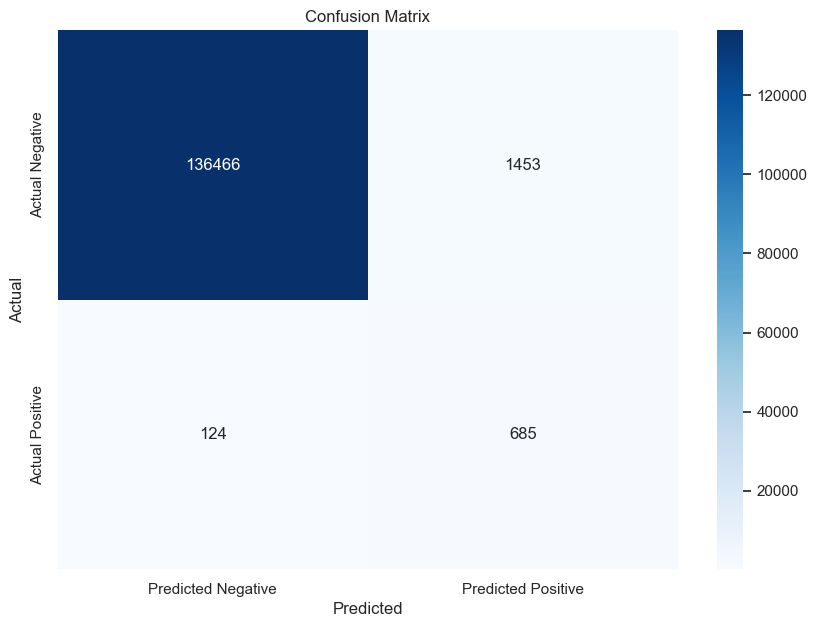

In [39]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


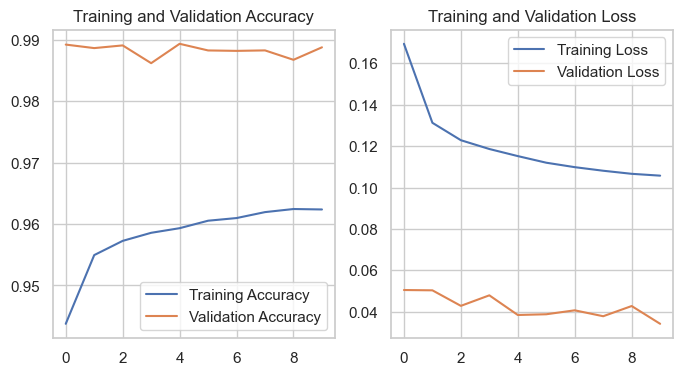

In [40]:

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

Probando que si se guarda el modelo y si funciona 

In [41]:

model.save('modelo-red-neuronal.h5')


In [42]:
from tensorflow.keras.models import load_model


loaded_model = load_model('modelo-red-neuronal.h5')

In [43]:
test_loss, test_acc = loaded_model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

predictions = loaded_model.predict(X_test)

4336/4336 - 4s - 971us/step - accuracy: 0.9886 - loss: 0.0342
Test accuracy: 0.9886324405670166
4336/4336 ━━━━━━━━━━━━━━━━━━━━ 4s 975us/step


In [44]:
y_scores = model.predict(X_test)

4336/4336 ━━━━━━━━━━━━━━━━━━━━ 4s 900us/step


In [45]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score


fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

precision, recall, _ = precision_recall_curve(y_test, y_scores)
average_precision = average_precision_score(y_test, y_scores)

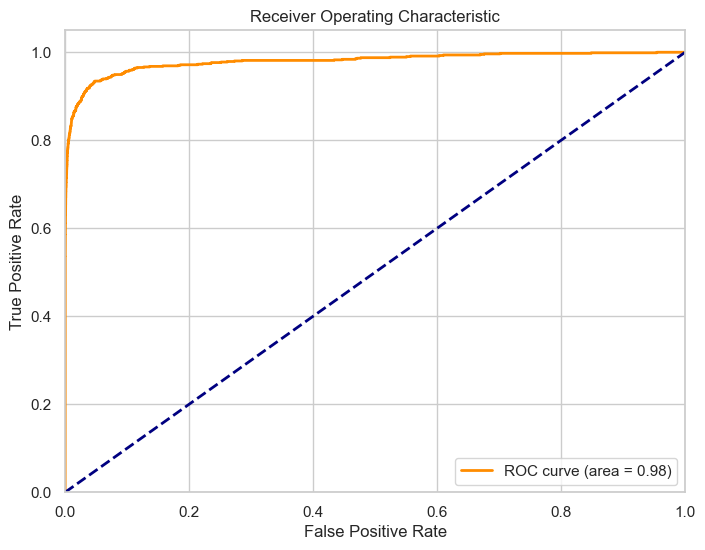

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


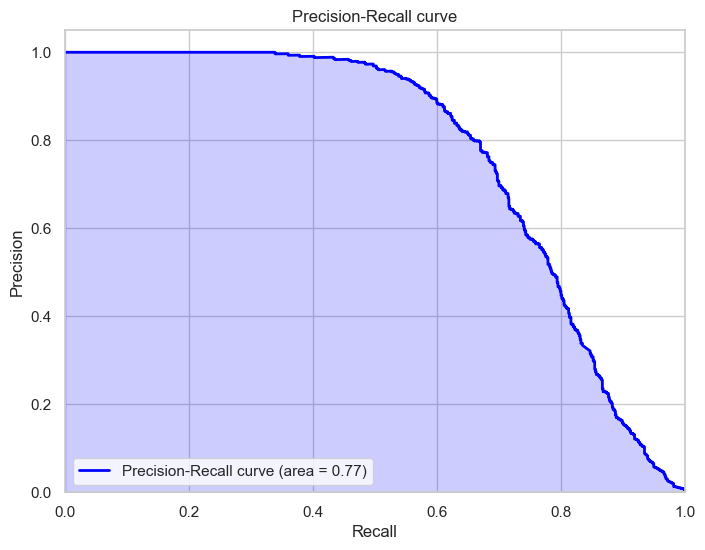

In [47]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % average_precision)
plt.fill_between(recall, precision, alpha=0.2, color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")
plt.show()


### Random Forest 


In [48]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]



In [49]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    137919
           1       0.87      0.75      0.81       809

    accuracy                           1.00    138728
   macro avg       0.94      0.87      0.90    138728
weighted avg       1.00      1.00      1.00    138728

[[137831     88]
 [   202    607]]


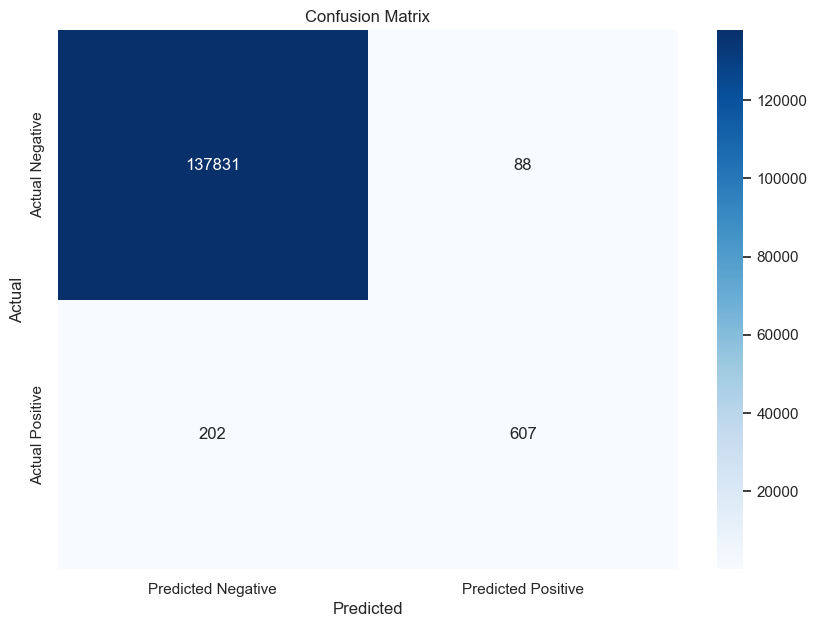

In [50]:
# Graficar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


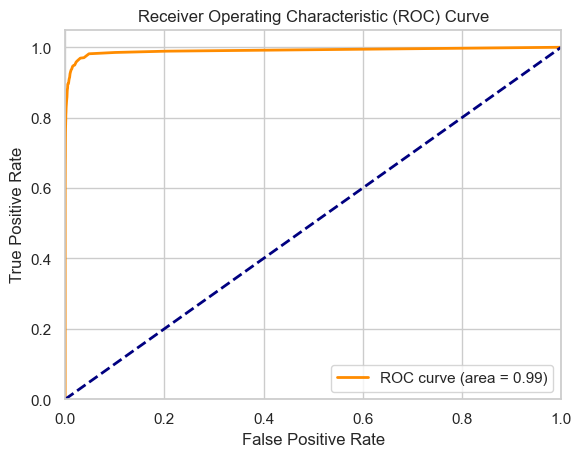

In [51]:

# Graficar la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


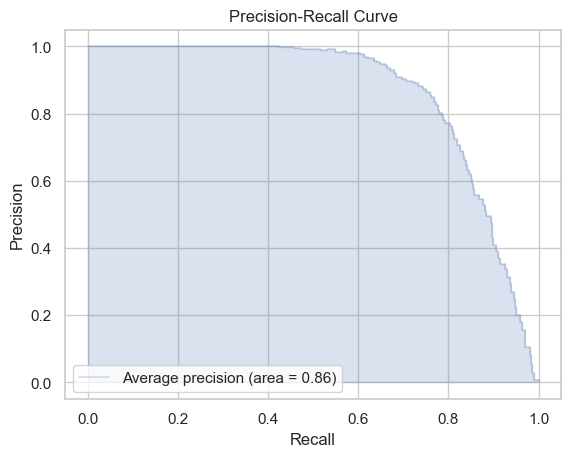

In [52]:

# Graficar la curva de precisión-recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
average_precision = average_precision_score(y_test, y_pred_prob)

plt.figure()
plt.step(recall, precision, where='post', color='b', alpha=0.2, label='Average precision (area = %0.2f)' % average_precision)
plt.fill_between(recall, precision, alpha=0.2, color='b', step='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [53]:
import joblib

joblib_file = "random_forest_model.h5"
joblib.dump(model, joblib_file)

['random_forest_model.h5']

### LIGHTGBM

In [59]:
%pip install --upgrade lightgbm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\program files\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [70]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Crear un dataset de LightGBM
train_data = lgb.Dataset(X_train_resampled, label=y_train_resampled)
valid_data = lgb.Dataset(X_dev, label=y_dev, reference=train_data)


# Parámetros del modelo
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': ['auc', 'binary_logloss'],
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Entrenar el modelo
gbm = lgb.train(params,
                train_data,
                num_boost_round=100,
                valid_sets=[train_data, valid_data],
                valid_names=['train', 'valid'])

# Predicciones en el conjunto de prueba
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

# Convertir probabilidades en clases (0 o 1)
y_pred_class = [1 if x >= 0.5 else 0 for x in y_pred]

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')




[LightGBM] [Info] Number of positive: 125065, number of negative: 625327
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.134423 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4795
[LightGBM] [Info] Number of data points in the train set: 750392, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166666 -> initscore=-1.609441
[LightGBM] [Info] Start training from score -1.609441
Accuracy: 0.9937503604175076
Precision: 0.4788011695906433
Recall: 0.8096415327564895
F1 Score: 0.6017455213596693
ROC AUC Score: 0.9880181369063017


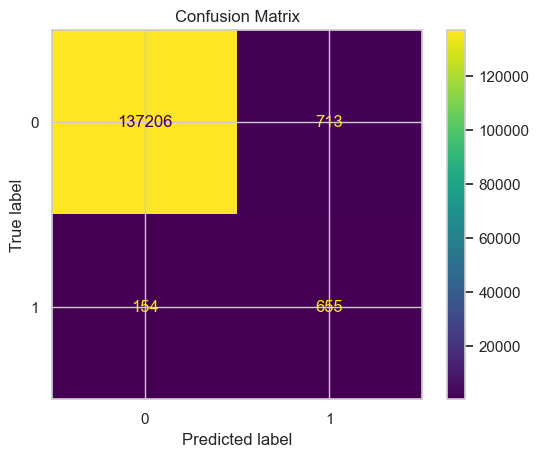

In [71]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()


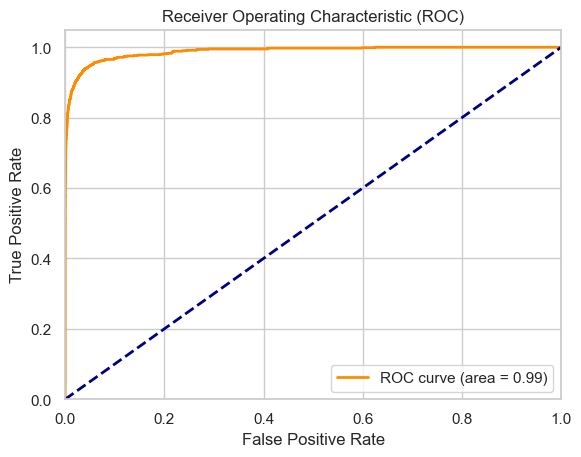

In [72]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


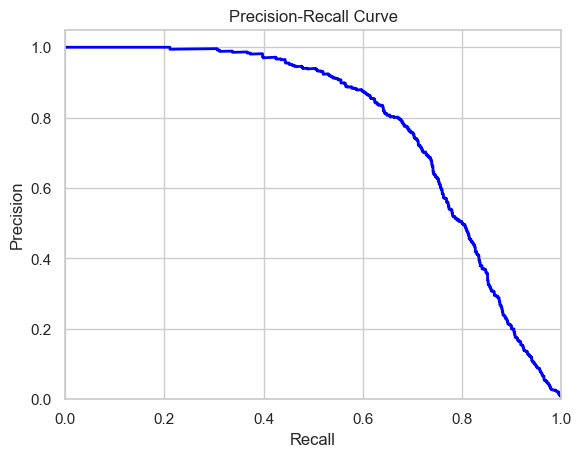

In [73]:
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred)
plt.figure()
plt.plot(recall_vals, precision_vals, color='blue', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()